In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter, AutoMinorLocator
from matplotlib import rcParams
import numpy as np

%matplotlib inline

In [2]:
font = {"size"   : 20}
plt.rc("font", **font)
plt.rc("legend",fontsize=18)
rcParams['axes.titlepad'] = 20 

df = pd.read_csv("pe.txt", header=None)
df.columns = ["layer", "binding_site", "coverage", "temp", "init_energy", "min_energy"]


FileNotFoundError: [Errno 2] No such file or directory: 'pe.txt'

In [50]:
df

,layer,binding_site,coverage,temp,init_energy,min_energy
0,41,tet,full,500000,-488872.365529,-505178.935654
1,41,tet,full,450000,-484243.423609,-504625.390258
2,41,tet,full,405000,-486920.285392,-505079.470363
3,41,tet,full,364500,-482570.527876,-504769.549948
4,41,tet,full,328050,-490536.197591,-505266.730612
...,...,...,...,...,...,...
104,41,tet,full,5,-501203.933004,-507409.829525
105,41,tet,full,4,-501203.938466,-507409.802621
106,41,tet,full,3,-501203.944040,-507409.834161
107,41,tet,full,2,-501203.949037,-507409.814011


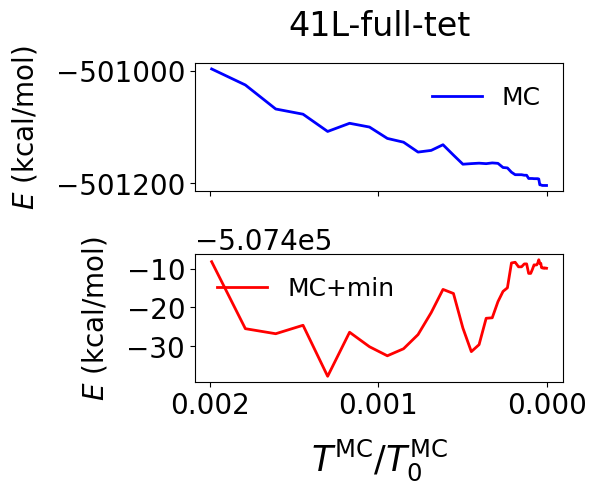

In [16]:
fig,axis = plt.subplots(2,1, sharex=True)

axis[0].set_ylabel(r"$E$ (kcal/mol)",labelpad=12)
axis[1].set_ylabel(r"$E$ (kcal/mol)",labelpad=12)

axis[1].set_xlabel(r"$T^\mathrm{MC}/T^\mathrm{MC}_{0}}$",labelpad=12, fontsize=25)

axis[0].plot(df.temp.tail(50)/df.temp.max(), df.init_energy.tail(50), "blue", linewidth=2, label="MC")

axis[1].plot(df.temp.tail(50)/df.temp.max(), df.min_energy.tail(50), "red", linewidth=2, label="MC+min")#
#axis[1].axhline(y=-507409.838284, color="red", ls="--")


axis[0].legend(frameon=False, fontsize=18, loc="best")
axis[1].legend(frameon=False, fontsize=18, loc="best")


axis[0].invert_xaxis()

fig.tight_layout()

axis[1].ticklabel_format(axis="y",style='plain')
#axis[1].invert_yaxis()
#axis[0].set_xscale('log')
#axis[1].set_xscale('log')

axis[0].title.set_text("41L-full-tet")

In [14]:
fig.savefig('energy_analyze.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('energy_analyze.png', dpi=300.0,format='png', bbox_inches = "tight")

In [3]:
df1 = pd.read_csv("41L_full_info.data", header=None, delimiter=" ")
df1 = df1.T
df1["layer"] = df1.index

In [4]:
df1[0]

0     135
1      36
2      36
3      35
4       3
5      31
6       6
7      30
8       6
9      30
10      7
11     27
12     11
13     24
14     12
15     24
16     12
17     24
18     12
19     24
20     12
21     26
22      6
23     34
24     36
25     36
Name: 0, dtype: int64

Text(0.5, 0, '$n_{\\mathrm{{Fe}_{oct}^{3+}}}/{n_{\\mathrm{{Fe}_{oct}}}}}}$')

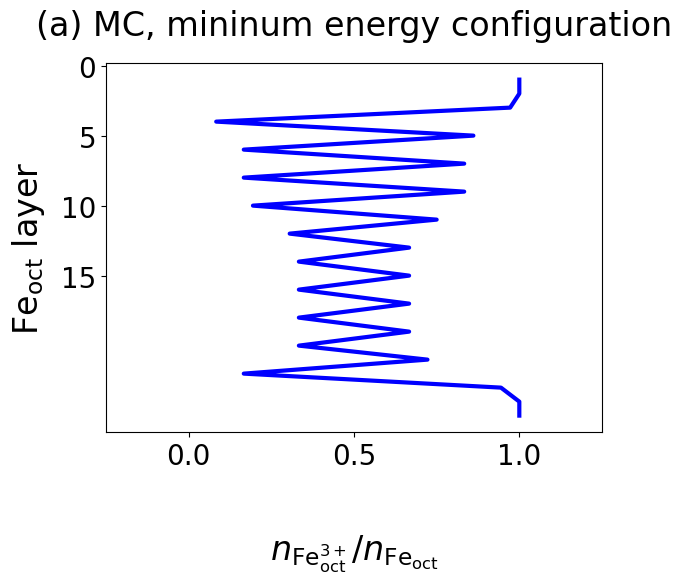

In [5]:
fig1, axs = plt.subplots()

axs.plot(df1[0][1:]/36, df1.layer[1:], linewidth=3, color="blue", label="MC min. configuration")

axs.set_ylim(axs.get_ylim()[::-1])
axs.set_xlim([-0.25, 1.25])
axs.set_yticks([0,5,10,15])

axs.set_title("(a) MC, mininum energy configuration", fontsize=24)

axs.set_ylabel(r"Fe$_\mathrm{oct}$ layer", ha="center", fontsize=24, labelpad=10)
axs.set_xlabel(r"$n_{\mathrm{{Fe}_{oct}^{3+}}}/{n_{\mathrm{{Fe}_{oct}}}}}}$", labelpad=45, fontsize=24)


In [6]:
fig1.savefig('a.pdf',format='pdf', bbox_inches = "tight")
fig1.savefig('a.png', dpi=300.0,format='png', bbox_inches = "tight")

Text(0.5, 0, '$n_{\\mathrm{{Fe}_{oct}^{3+}}}/{n_{\\mathrm{{Fe}_{oct}}}}}}$')

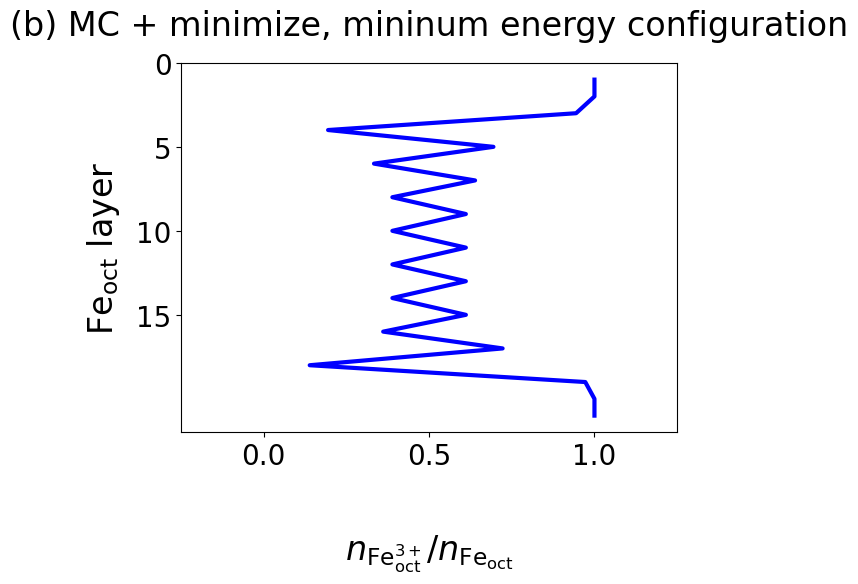

In [41]:
fig2, axs = plt.subplots()

axs.plot(df1[1][1:]/36, df1.layer[1:], linewidth=3, color="blue", label="MC min. configuration")

axs.set_ylim(axs.get_ylim()[::-1])
axs.set_xlim([-0.25, 1.25])
axs.set_yticks([0,5,10,15])

axs.set_title("(b) MC + minimize, mininum energy configuration", fontsize=24)

axs.set_ylabel(r"Fe$_\mathrm{oct}$ layer", ha="center", fontsize=24, labelpad=10)
axs.set_xlabel(r"$n_{\mathrm{{Fe}_{oct}^{3+}}}/{n_{\mathrm{{Fe}_{oct}}}}}}$", labelpad=45, fontsize=24)

In [42]:
fig2.savefig('b.pdf',format='pdf', bbox_inches = "tight")
fig2.savefig('b.png', dpi=300.0,format='png', bbox_inches = "tight")